# IPPR Lab 02

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
original_image_path = '/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.101.jpg'
# '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/moderateDem15.jpg'

original_image = cv2.imread(original_image_path)
print('Shape: ', original_image.shape)

Shape:  (500, 440, 3)


Shape:  (500, 440)


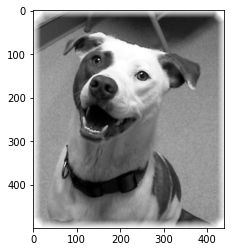

In [4]:
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
print('Shape: ', img.shape)
plt.imshow(img, cmap='gray')

# Resize

Shape:  (600, 600)


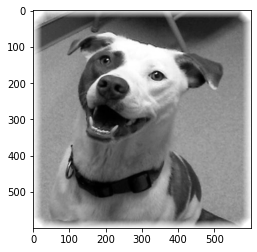

In [5]:
# Resize with Interplotation

resized_img = cv2.resize(img, (600, 600), interpolation = cv2.INTER_LINEAR)
print('Shape: ', resized_img.shape)
plt.imshow(resized_img, cmap='gray')

# Average Filtering

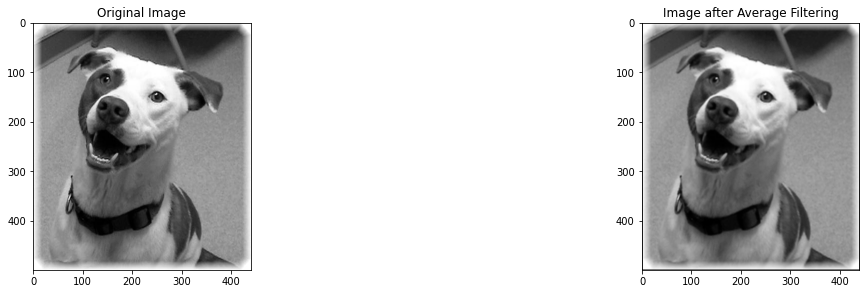

In [9]:
m, n = img.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image
filtered_img = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
		
		filtered_img[i, j]= temp
		
filtered_img = filtered_img.astype(np.uint8)

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2,2,1)
plt.title('Original Image')
ax1.imshow(img, cmap='gray')
ax2 = fig.add_subplot(2,2,2)
plt.title('Image after Average Filtering')
ax2.imshow(filtered_img, cmap='gray')

# Median Filtering

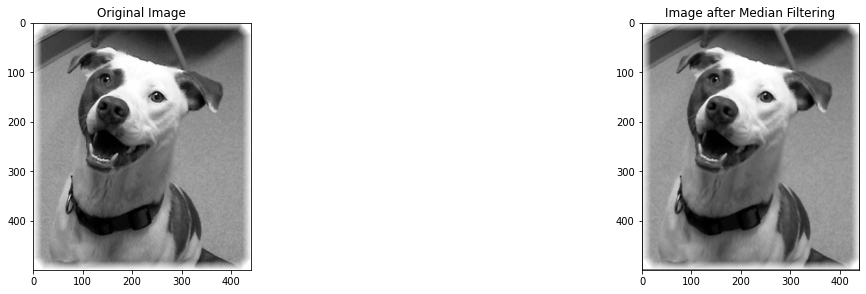

In [10]:
m, n = img.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
med_filtered_img = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img[i-1, j-1],
                img[i-1, j],
                img[i-1, j + 1],
                img[i, j-1],
                img[i, j],
                img[i, j + 1],
                img[i + 1, j-1],
                img[i + 1, j],
                img[i + 1, j + 1]]

        temp = sorted(temp)
        med_filtered_img[i, j]= temp[4]

med_filtered_img = med_filtered_img.astype(np.uint8)

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2,2,1)
plt.title('Original Image')
ax1.imshow(img, cmap='gray')
ax2 = fig.add_subplot(2,2,2)
plt.title('Image after Median Filtering')
ax2.imshow(med_filtered_img, cmap='gray')

# cv2 Blur, Median Blur and Gaussian Blur

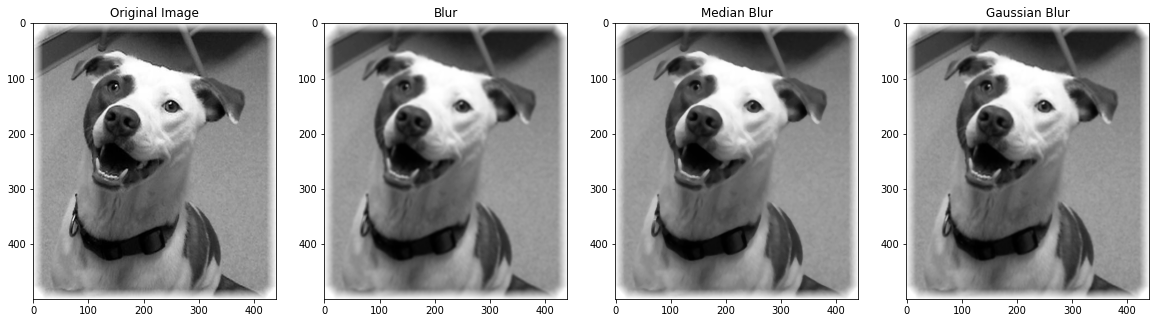

In [11]:
blur = cv2.blur(img, (5, 5))
median_blur = cv2.medianBlur(img, 5)
gaussian_blur = cv2.GaussianBlur(img, (5,5), 0)

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(1,4,1)
plt.title('Original Image')
ax1.imshow(img, cmap='gray')
ax2 = fig.add_subplot(1,4,2)
plt.title('Blur')
ax2.imshow(blur, cmap='gray')
ax3 = fig.add_subplot(1,4,3)
plt.title('Median Blur')
ax3.imshow(median_blur, cmap='gray')
ax4 = fig.add_subplot(1,4,4)
plt.title('Gaussian Blur')
ax4.imshow(gaussian_blur, cmap='gray')

# Histogram Equalization

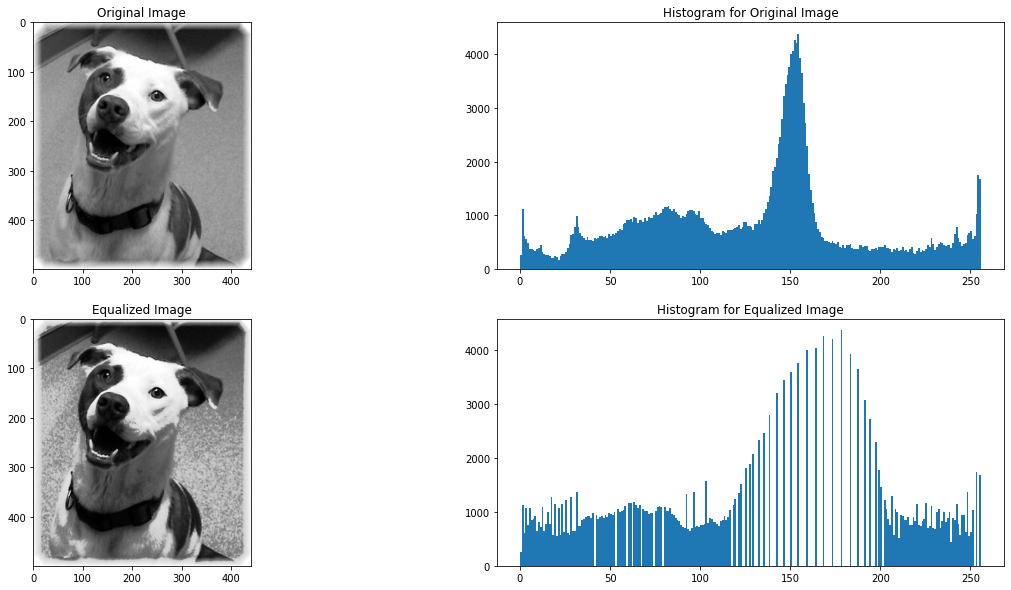

In [12]:
equ = cv2.equalizeHist(img)

fig = plt.figure(figsize = (20, 10))

fig.add_subplot(221)
plt.title('Original Image')
plt.set_cmap('gray')
plt.imshow(img)

fig.add_subplot(222)
plt.title('Histogram for Original Image')
plt.hist(img.ravel(),256,[0,256])

fig.add_subplot(223)
plt.title('Equalized Image')
plt.set_cmap('gray')
plt.imshow(equ)

fig.add_subplot(224)
plt.title('Histogram for Equalized Image')
plt.hist(equ.ravel(),256,[0,256])

plt.show()